# FITTING TRANSFER FUNCTIONS

# Preliminaries

In [1]:
import controlSBML as ctl
import controlSBML.constants as cn
import controlSBML.siso_transfer_function_builder as stb
from controlSBML.staircase import Staircase

import control
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tellurium as te

# Models

## Linear Model

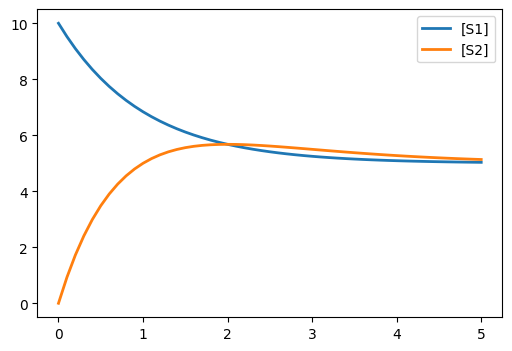

In [2]:
LINEAR_MDL = """
J0:  -> S1; k1
J1: S1 -> S2; S1
J2: S2 -> ; S2

k1 = 5
S1 = 10
S2 = 0
"""
rr = te.loada(LINEAR_MDL)
rr.simulate()
rr.plot()

## Wolf Model

In [3]:
ctlsb = ctl.ControlSBML(LINEAR_MDL, input_names=["S1"], output_names=["S2"])
LINEAR_BUILDER = ctlsb.makeSISOTransferFunctionBuilder()

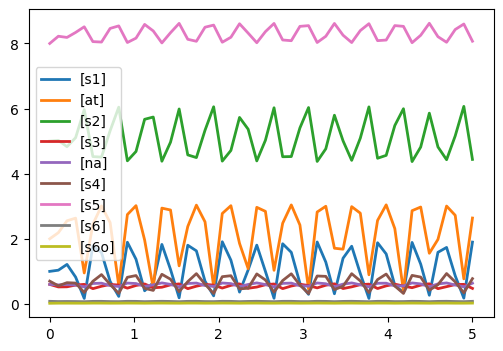

In [4]:
WOLF_URL = "https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000206.2?filename=BIOMD0000000206_url.xml"
rr = te.loadSBMLModel(WOLF_URL)
rr.simulate(0, 5, 50)
rr.plot()

In [5]:
ctlsb = ctl.ControlSBML("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000206.2?filename=BIOMD0000000206_url.xml",
              input_names=["s5"], output_names=["s6"])
WOLF_BUILDER = ctlsb.makeSISOTransferFunctionBuilder()

In [21]:
dir(control)


['ControlArgument',
 'ControlDimension',
 'ControlMIMONotImplemented',
 'ControlNotImplemented',
 'ControlSlycot',
 'DescribingFunctionNonlinearity',
 'FRD',
 'FrequencyResponseData',
 'InputOutputSystem',
 'InterconnectedSystem',
 'LinearICSystem',
 'LinearIOSystem',
 'NonlinearIOSystem',
 'StateSpace',
 'TimeResponseData',
 'TransferFunction',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'acker',
 'append',
 'augw',
 'balred',
 'bdalg',
 'bdschur',
 'bode',
 'bode_plot',
 'box_grid',
 'c2d',
 'canonical',
 'canonical_form',
 'care',
 'common_timebase',
 'config',
 'connect',
 'correlation',
 'create_estimator_iosystem',
 'create_statefbk_iosystem',
 'ctrb',
 'ctrlutil',
 'cvxopt_check',
 'cvxopt_installed',
 'damp',
 'dare',
 'db2mag',
 'dcgain',
 'defaults',
 'delay',
 'descfcn',
 'describing_function',
 'describing_function_plot',
 'dlqe',
 'dlqr',
 'dlyap',
 'drss',
 'dt

In [6]:
print(ctlsb.antimony)

// Created by libAntimony v2.13.2
model *Wolf2000_Glycolytic_Oscillations()

  // Compartments and Species:
  compartment compartment_;
  species s1 in compartment_, at_ in compartment_, s2 in compartment_, s3 in compartment_;
  species na in compartment_, s4 in compartment_, s5 in compartment_, s6 in compartment_;
  species s6o in compartment_;

  // Reactions:
  v1: s1 + 2 at_ -> s2; compartment_*k1*s1*at_/(1 + (at_/ki)^n);
  v2: s2 -> 2 s3; compartment_*k2*s2;
  v3: s3 + na -> s4 + at_; compartment_*((k31*k32*s3*na*(atot - at_) - k33*k34*s4*at_*(ntot - na))/(k33*(ntot - na) + k32*(atot - at_)));
  v4: s4 -> s5 + at_; compartment_*k4*s4*(atot - at_);
  v5: s5 -> s6; compartment_*k5*s5;
  v7: at_ -> ; compartment_*k7*at_;
  v8: s3 -> na; compartment_*k8*s3*(ntot - na);
  v9: s6o -> ; compartment_*k9*s6o;
  v10: s6 -> 0.1 s6o; compartment_*k10*(s6 - s6o);
  v6: s6 -> na; compartment_*k6*s6*(ntot - na);
  v0:  -> s1; compartment_*k0;

  // Species initializations:
  s1 = 1;
  at_ = 2;
 

# Fitting Transfer Functions

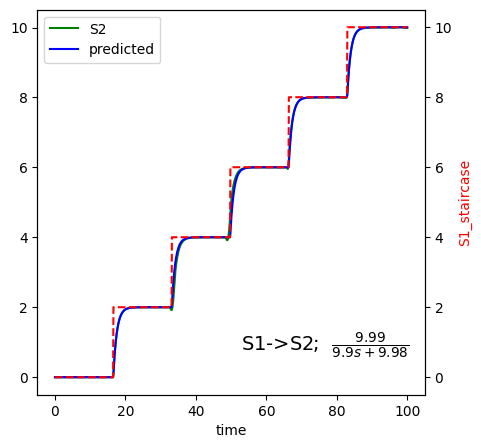

In [7]:
fitter_result = LINEAR_BUILDER.fitTransferFunction(1, 2, end_time=100)
_ = LINEAR_BUILDER.plotFit(fitter_result, figsize=(5,5))

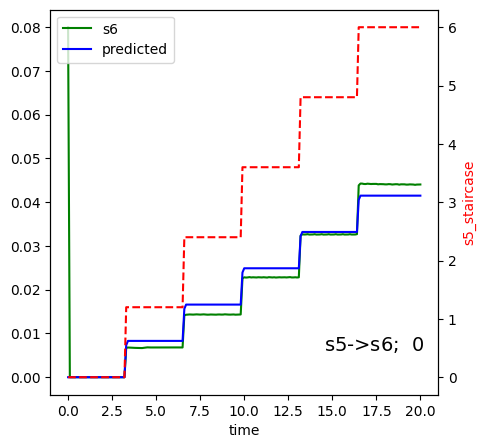

In [8]:
staircase = Staircase(final_value=6)
fitter_result = WOLF_BUILDER.fitTransferFunction(1, 2, end_time=20, staircase=staircase)
_ = WOLF_BUILDER.plotFit(fitter_result, figsize=(5,5))

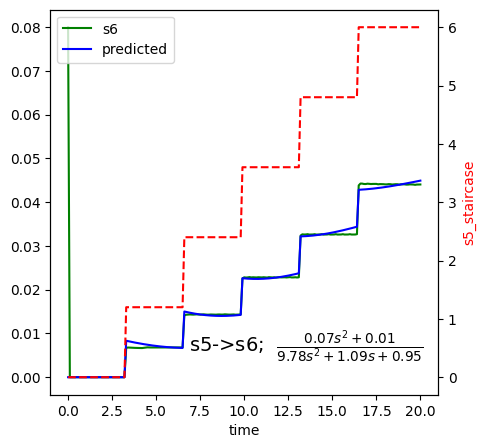

In [9]:
fitter_result = WOLF_BUILDER.fitTransferFunction(3, 3, end_time=20, staircase=staircase)
_ = WOLF_BUILDER.plotFit(fitter_result, figsize=(5,5))

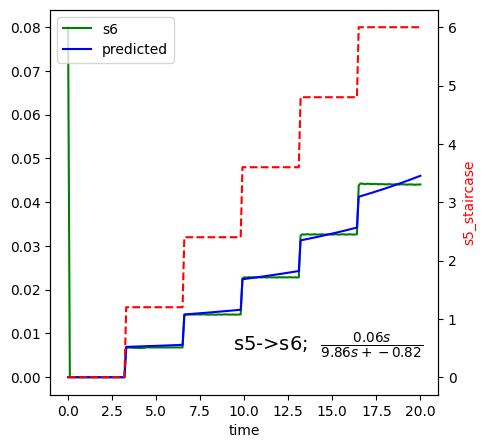

In [10]:
fitter_result = WOLF_BUILDER.fitTransferFunction(2, 2, end_time=20, staircase=staircase)
_ = WOLF_BUILDER.plotFit(fitter_result, figsize=(5,5))

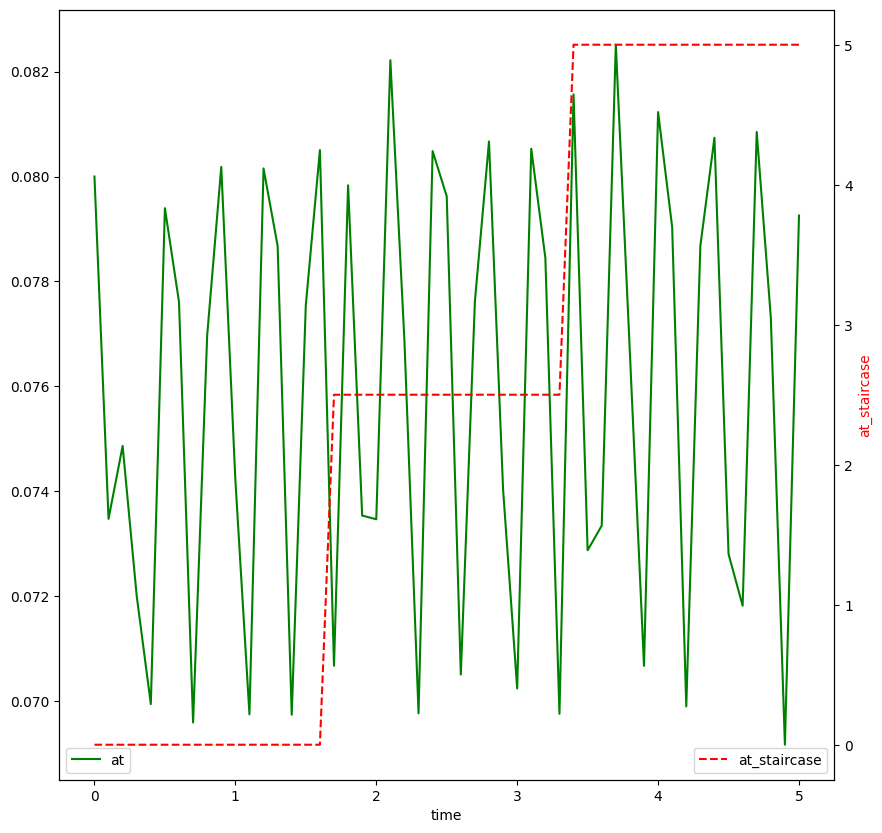

In [18]:
staircase = Staircase(num_step=2, final_value = 5)
ctlsb = ctl.ControlSBML("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000206.2?filename=BIOMD0000000206_url.xml",
              input_names=["at"], output_names=["s6"])
wolf_builder = ctlsb.makeSISOTransferFunctionBuilder(is_fixed_input_species=False)
#fitter_result = wolf_builder.fitTransferFunction(2, 2, end_time=2, staircase=staircase)
#wolf_builder.plotFit(fitter_result, figsize=(5,5))
wolf_builder.plotStaircaseResponse(staircase=staircase)

In [ ]:
import SBMLDiagrams
import tellurium as te

r = te.loada ('''
A -> B; v;
B -> C; v;
C -> D; v;
v = 0
''')

df = SBMLDiagrams.load(ctlsb.roadrunner.getSBML())
df.autolayout()
df.draw()